<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Lr_RF_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/trainFeats.csv')
data

,Lbp_energy,Lbp_entropy,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Gabor_energy,Gabor_entropy,Class
0,0.004272,0.112200,0.697536,0.780786,0.018247,0.005240,0.327374,0.244308,0.582659,0
1,0.004368,0.112068,0.522301,0.663354,0.035402,0.003820,0.513235,0.393123,0.423813,0
2,0.004514,0.112046,0.607547,0.721058,0.024451,0.006211,0.361757,0.460811,0.360280,0
3,0.004258,0.112222,0.681370,0.772397,0.015774,0.008025,0.210022,0.373282,0.436471,0
4,0.005593,0.111599,0.325707,0.495151,0.077220,0.007627,0.592398,0.561547,0.281926,0
...,...,...,...,...,...,...,...,...,...,...
1615,0.054588,0.090633,0.072722,0.158206,0.355121,0.054551,0.580219,0.471660,0.313885,5
1616,0.019373,0.104959,0.030105,0.088782,0.505788,0.066971,0.631408,0.567639,0.263928,5
1617,0.045477,0.094813,0.121184,0.211247,0.300278,0.034198,0.581198,0.401995,0.368375,5
1618,0.003272,0.112534,0.018284,0.081525,0.475006,0.070419,0.646659,0.681157,0.165958,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3d38d1358>,
      dtype=object)

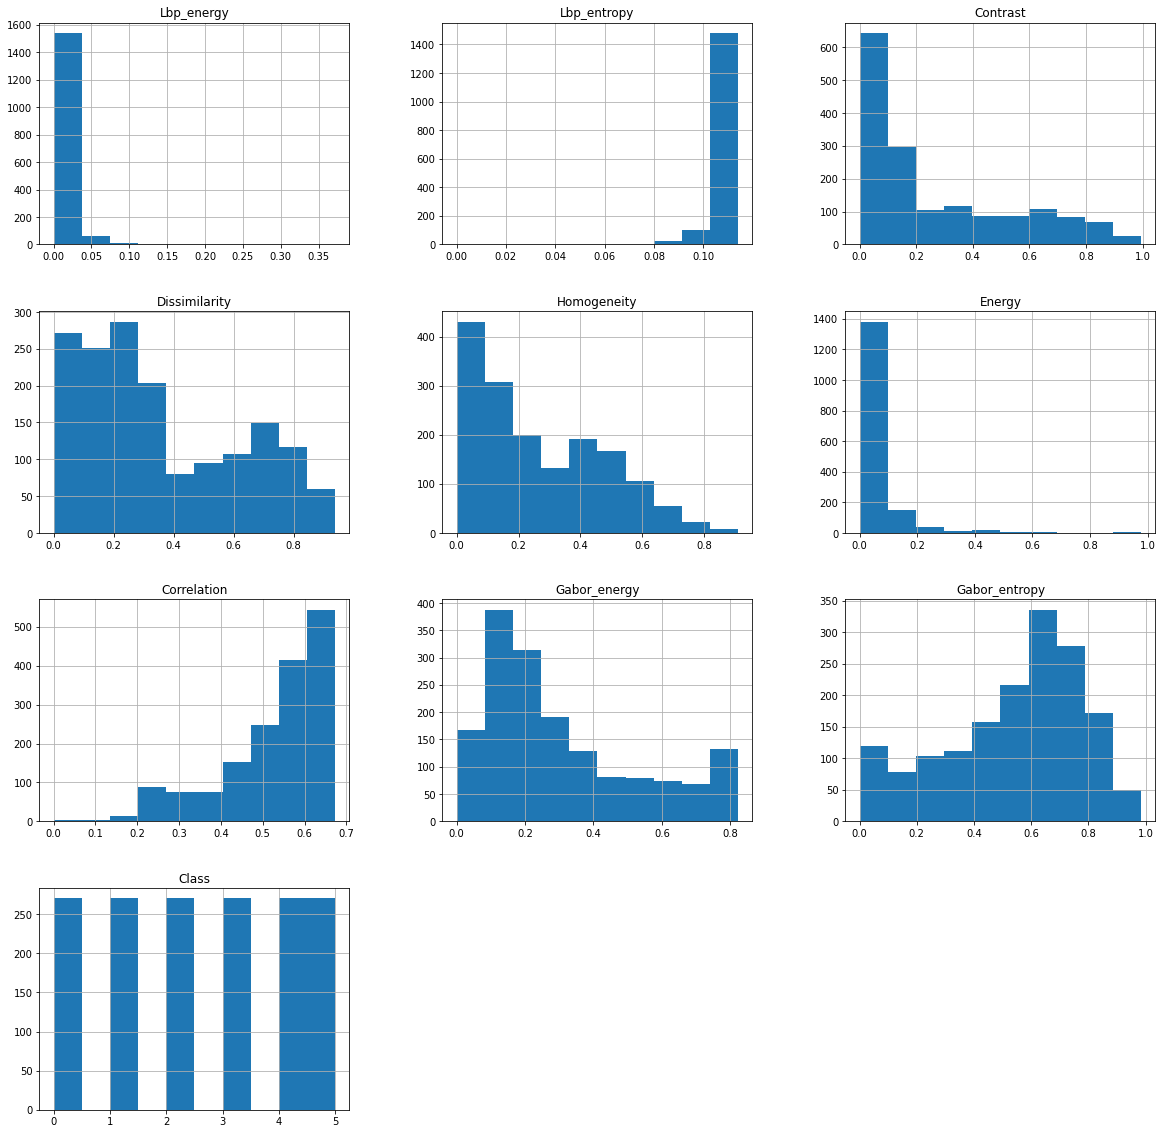

In [3]:
data.hist(figsize=(20,20))

5    270
4    270
3    270
2    270
1    270
0    270
Name: Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


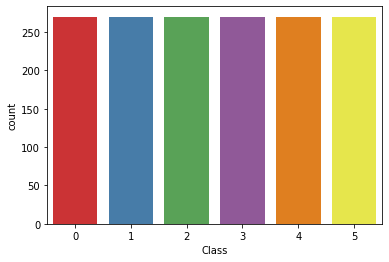

In [4]:
print(data.Class.value_counts())
sns.countplot(data['Class'], palette='Set1')
plt.show()

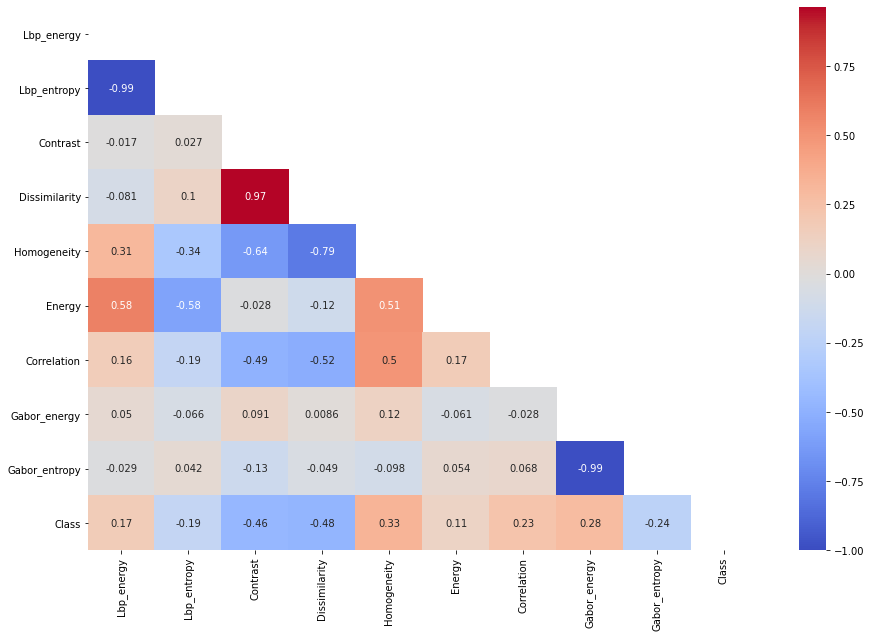

In [5]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), vmin = -1, cmap = 'coolwarm', annot = True, mask=mask)
plt.show()

In [6]:
x = data.drop(['Class','Lbp_energy','Gabor_entropy','Dissimilarity'], axis = 1)
y = data['Class']
print(x,y)

      Lbp_entropy  Contrast  Homogeneity    Energy  Correlation  Gabor_energy
0        0.112200  0.697536     0.018247  0.005240     0.327374      0.244308
1        0.112068  0.522301     0.035402  0.003820     0.513235      0.393123
2        0.112046  0.607547     0.024451  0.006211     0.361757      0.460811
3        0.112222  0.681370     0.015774  0.008025     0.210022      0.373282
4        0.111599  0.325707     0.077220  0.007627     0.592398      0.561547
...           ...       ...          ...       ...          ...           ...
1615     0.090633  0.072722     0.355121  0.054551     0.580219      0.471660
1616     0.104959  0.030105     0.505788  0.066971     0.631408      0.567639
1617     0.094813  0.121184     0.300278  0.034198     0.581198      0.401995
1618     0.112534  0.018284     0.475006  0.070419     0.646659      0.681157
1619     0.113067  0.048362     0.321727  0.049522     0.647682      0.644186

[1620 rows x 6 columns] 0       0
1       0
2       0
3       0

In [10]:

from sklearn.linear_model import LogisticRegression

logreg =LogisticRegression(random_state=1)

logreg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
data1 = pd.read_csv('/content/testFeats.csv')
x_test = data1.drop(['Class','Lbp_energy','Gabor_entropy','Dissimilarity'], axis = 1)
y_test = data1['Class']


y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy:{:.2f}".format(acc))

Test set accuracy:0.87


In [14]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.69      0.90      0.78        10
           2       0.90      0.90      0.90        10
           3       0.86      0.60      0.71        10
           4       0.91      1.00      0.95        10
           5       0.90      0.90      0.90        10

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.86        60
weighted avg       0.88      0.87      0.86        60



In [15]:
cm_lr = confusion_matrix(y_test, y_pred)


In [16]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
       print("Confusion matrix, without normalization ")
    
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

Confusion matrix, without normalization 
[[ 9  0  1  0  0  0]
 [ 0  9  0  1  0  0]
 [ 0  0  9  0  0  1]
 [ 0  3  0  6  1  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  9]]


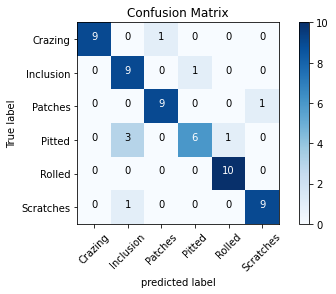

In [17]:
cm_plot_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
plot_confusion_matrix(cm=cm_lr, classes=cm_plot_labels, title='Confusion Matrix')

In [18]:
from sklearn.ensemble import  RandomForestClassifier

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(x, y) # print(rfc)

    train_predictions = rfc.predict(x)
    test_predictions = rfc.predict(x_test)

    train_scores.append(round(accuracy_score(y, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well

The training scores were: [0.97, 0.97, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.9, 0.88, 0.93, 0.95, 0.95, 0.95, 0.95, 0.97]


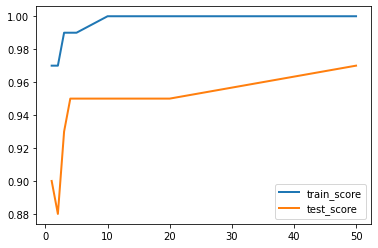

In [19]:

z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

In [20]:
cm_rf = confusion_matrix(y_test, test_predictions)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



Confusion matrix, without normalization 
[[ 9  0  1  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  9]]


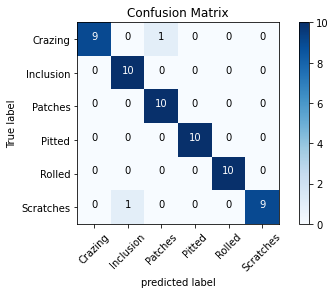

In [23]:
cm_plot_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
plot_confusion_matrix(cm=cm_rf, classes=cm_plot_labels, title='Confusion Matrix')